In [159]:
#Packages:
import pandas as pd
import numpy as np
import pyreadr as pyr
import sklearn as sk
import matplotlib.pyplot as plt
import scipy as sc
import os
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *



In [160]:
os.chdir("C:/Users/juand/Desktop/Big Data/Taller 2") #Working directory. 

####Train #########
tr_p=pyr.read_r("train_personas.Rds") 
tr_h=pyr.read_r("train_hogares.Rds")
print(tr_p.keys())
print(tr_h.keys())
df_trp=tr_p[None] #train Data frame (individuals). 
df_trh=tr_h[None] #Train Data frame (households). 

odict_keys([None])
odict_keys([None])


In [161]:
df=pd.merge(df_trp, df_trh, on="id") #Train master data frame (merge by unique identificator key). 

In [162]:
df.columns

Index(['id', 'Orden', 'Clase_x', 'Dominio_x', 'Estrato1', 'P6020', 'P6040',
       'P6050', 'P6090', 'P6100',
       ...
       'Ingpcug', 'Li', 'Lp', 'Pobre', 'Indigente', 'Npobres', 'Nindigentes',
       'Fex_c_y', 'Depto_y', 'Fex_dpto_y'],
      dtype='object', length=157)

In [163]:
#Test ############3
te_p=pyr.read_r("test_personas.Rds") 
te_h=pyr.read_r("test_hogares.Rds")
print(te_p.keys())
print(te_h.keys())
df_tep=te_p[None] #test Data frame (individuals). 
df_teh=te_h[None] #test Data frame (households). 

odict_keys([None])
odict_keys([None])


In [164]:
df_test=pd.merge(df_tep, df_teh, on="id") #Train master data frame (merge by unique identificator key). 

In [165]:
#Missing values count/share in train.
df.isnull().sum() 
df.isnull().sum()/len(df) 

id             0.0
Orden          0.0
Clase_x        0.0
Dominio_x      0.0
Estrato1       0.0
              ... 
Npobres        0.0
Nindigentes    0.0
Fex_c_y        0.0
Depto_y        0.0
Fex_dpto_y     0.0
Length: 157, dtype: float64

In [166]:
#Train ######################################
#Convert categorical variables to dummy variables:
estrato1_d=pd.get_dummies(df["Estrato1"], prefix="estrato") 
maxeduc_d=pd.get_dummies(df["P6210"], prefix="educ") 

#Merge dummy's variables data frame with master data frame:
df=pd.merge(df, estrato1_d, left_index=True, right_index=True)
df=pd.merge(df, maxeduc_d, left_index=True, right_index=True)

#Test ######################33
maxeduc_d=pd.get_dummies(df_test["P6210"], prefix="educ") 

#Merge dummy's variables data frame with master data frame:
df_test=pd.merge(df_test, estrato1_d, left_index=True, right_index=True)
df_test=pd.merge(df_test, maxeduc_d, left_index=True, right_index=True)

In [167]:

#Recode variables train ###########
df["Ingtotugarrp"]=df["Ingtotugarr"]/df["Nper"] #Mean of household income. 
df["P6020"]=np.where(df["P6020"]==1, 0, 1) #Recode sex, woman=1 
df["P6585s3"]=np.where(((df["P6585s3"]==9) & (df["P6585s3"]==2)), 0, 1) #Recode sex, woman=1 

#Test ##################
df_test["P6020"]=np.where(df_test["P6020"]==1, 0, 1) #Recode sex, woman=1 
df_test["P6585s3"]=np.where(((df_test["P6585s3"]==9) & (df_test["P6585s3"]==2)), 0, 1) #Recode sex, woman=1 



In [168]:
#Generate descriptive statistics of train dataset
ds=(df[["Ingtotugarr", "Ingtot", "P6040", "Nper", "Pobre", "P6020", "estrato_1.0", "estrato_2.0", "estrato_3.0", 
"estrato_4.0", "estrato_5.0", "estrato_6.0", "educ_1.0", "educ_2.0", "educ_3.0", "educ_4.0", "educ_5.0", "educ_6.0", "P6585s3", "Oc"]].describe(include="all"))
ds=ds.T
ds=ds[["count", "mean", "std", "min", "50%", "max"]]
ds=ds.round(2)
print(ds.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &     count &        mean &         std &  min &         50\% &          max \\
\midrule
Ingtotugarr &  542941.0 &  2494456.17 &  2640107.05 &  0.0 &  1796407.33 &  88833333.33 \\
Ingtot      &  447512.0 &   775591.56 &  1380447.03 &  0.0 &   430000.00 &  85833333.33 \\
P6040       &  542941.0 &       33.55 &       21.64 &  0.0 &       31.00 &       110.00 \\
Nper        &  542941.0 &        4.25 &        2.07 &  1.0 &        4.00 &        22.00 \\
Pobre       &  542941.0 &        0.25 &        0.43 &  0.0 &        0.00 &         1.00 \\
P6020       &  542941.0 &        0.53 &        0.50 &  0.0 &        1.00 &         1.00 \\
estrato\_1.0 &  542941.0 &        0.22 &        0.41 &  0.0 &        0.00 &         1.00 \\
estrato\_2.0 &  542941.0 &        0.26 &        0.44 &  0.0 &        0.00 &         1.00 \\
estrato\_3.0 &  542941.0 &        0.22 &        0.42 &  0.0 &        0.00 &         1.00 \\
estrato\_4.0 &  542941.0 &        0.11 &        0.32

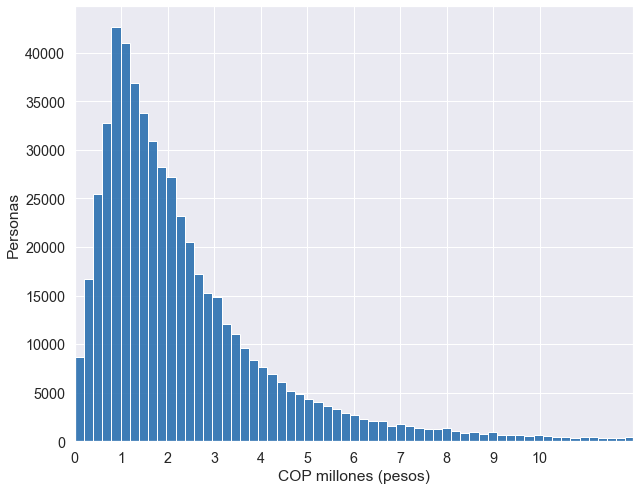

In [173]:

df["Ingtotugarr_m"]=df["Ingtotugarr"]/1000000
#Histogram of total household income:
plt.hist(df["Ingtotugarr_m"], bins=450, color = (0.17, 0.44, 0.69, 0.9))
plt.xlim(0,12)
#plt.ylim(0,10000)
plt.xticks([i for i in range(11)])
plt.ylabel("Personas")
plt.xlabel("COP millones (pesos)")
plt.savefig("histy.jpg", bbox_inches="tight")
plt.show()

In [220]:
###Split train and test using training database. 
#Train sub test database using PSM to reproduce test 


df_test["test"]=1
df["test"]=0
c=list(df_test.columns)
df_2=df[c]
df_tt=df_2.append(df_test, ignore_index=True)
df_tt=df_tt.reset_index()
df_tt["index"]=pd.to_numeric(df_tt["index"])
df_tt["test"]=pd.to_numeric(df_tt["test"])

In [221]:
psm = PsmPy(df_tt, treatment='test', indx="index")

AssertionError: Only numeric dtypes allowed